In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

import datetime as dt
import matplotlib.dates as mdates


In [ ]:
# Подключаем Диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загружаем данные
df = pd.read_csv('/content/drive/My Drive/datasets/date_csv/Google_Stock_Price_Train.csv', sep=',')
data = df.loc[:,["Open"]].values

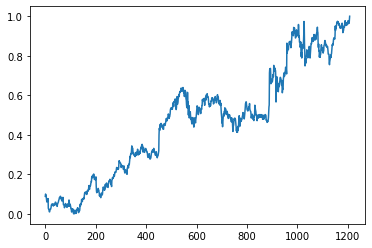

In [ ]:
# Подготовка данных
train = data[:len(data)-50] 
test = data[len(train):]
train=train.reshape(train.shape[0],1)

scaler = MinMaxScaler(feature_range= (0,1)) 
train_scaled = scaler.fit_transform(train) 

plt.plot(train_scaled)
plt.show()

In [ ]:
# Формируем выборки
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [ ]:
inputs = data[len(data) - len(test) - timesteps:]
inputs = scaler.transform(inputs)  

In [ ]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Создаём LSTM модель
model = Sequential()
model.add(LSTM(10, input_shape=(None,1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=15, batch_size=1)

Epoch 1/15
1158/1158 [==============================] - 4s 3ms/step - loss: 0.0262
Epoch 2/15
1158/1158 [==============================] - 4s 3ms/step - loss: 0.0012
Epoch 3/15
1158/1158 [==============================] - 4s 3ms/step - loss: 9.7558e-04
Epoch 4/15
1158/1158 [==============================] - 4s 3ms/step - loss: 9.1252e-04
Epoch 5/15
1158/1158 [==============================] - 4s 3ms/step - loss: 8.1393e-04
Epoch 6/15
1158/1158 [==============================] - 4s 3ms/step - loss: 7.0479e-04
Epoch 7/15
1158/1158 [==============================] - 4s 3ms/step - loss: 6.0869e-04
Epoch 8/15
1158/1158 [==============================] - 4s 3ms/step - loss: 5.3369e-04
Epoch 9/15
1158/1158 [==============================] - 4s 3ms/step - loss: 5.1182e-04
Epoch 10/15
1158/1158 [==============================] - 4s 3ms/step - loss: 4.6549e-04
Epoch 11/15
1158/1158 [==============================] - 4s 3ms/step - loss: 4.2159e-04
Epoch 12/15
1158/1158 [==========================

In [ ]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

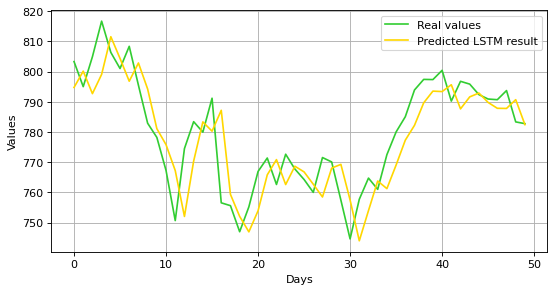

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_data2,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()